In [4]:
# ### 1. Importing Libraries
# These are the libraries we will be using for data manipulation, visualization, and machine learning.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, PrecisionRecallDisplay
from imblearn.over_sampling import SMOTE
import joblib
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    roc_curve,
    RocCurveDisplay,
    precision_recall_curve,
    PrecisionRecallDisplay,
    average_precision_score
)


sns.set(style="whitegrid")



In [7]:
df = pd.read_csv(r'C:\Users\mofok\OneDrive\Desktop\Credit-Card-Fraud-Detection\data\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
display(df.describe())


Dataset contains 284807 rows and 31 columns.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
# proportion of transactions that are fraud
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]

fractional_value = len(fraud)/(len(valid))
print("Fractional value:", fractional_value)

print("Fraud Cases detected: {}".format(len(df[df['Class'] == 1])))
print("Valid Transactions: {}".format(len(df[df['Class'] == 0])))
print("Total Transactions: {}".format(len(df)))

Fractional value: 0.0017304750013189597
Fraud Cases detected: 492
Valid Transactions: 284315
Total Transactions: 284807


In [10]:
# === Missing Values & Duplicates ===
print("\nMissing values per column:\n", df.isna().sum())
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()
print("After dropping duplicates:", df.shape)
if df.isna().sum().sum() > 0:
    df = df.dropna()
    print("After dropping NA:", df.shape)



Missing values per column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Duplicate rows: 1081
After dropping duplicates: (283726, 31)


In [11]:
# === Dataset Info ===
print("\nDataset info:")
df.info()



Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  

Percentage of fraudulent transactions: 0.1667%
This confirms a severe class imbalance, which must be addressed in our modeling.


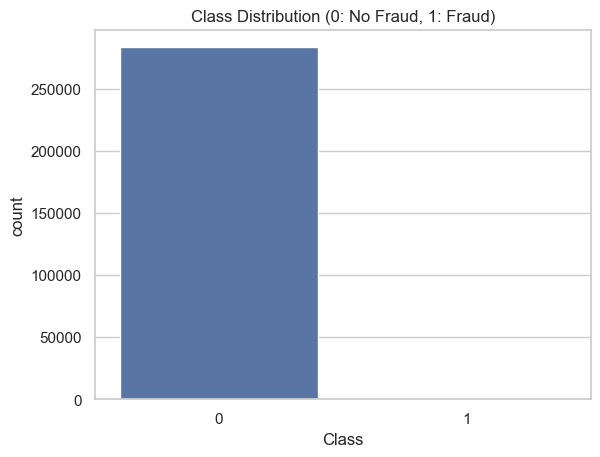

Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


In [12]:
# === Class Balance ===
fraud_counts = df['Class'].value_counts()
transaction = len(df)

fraud_percentage = (fraud_counts.get(1, 0) / transaction) * 100
print(f"Percentage of fraudulent transactions: {fraud_percentage:.4f}%")
print("This confirms a severe class imbalance, which must be addressed in our modeling.")

sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0: No Fraud, 1: Fraud)")
plt.show()
print(df["Class"].value_counts(normalize=True))



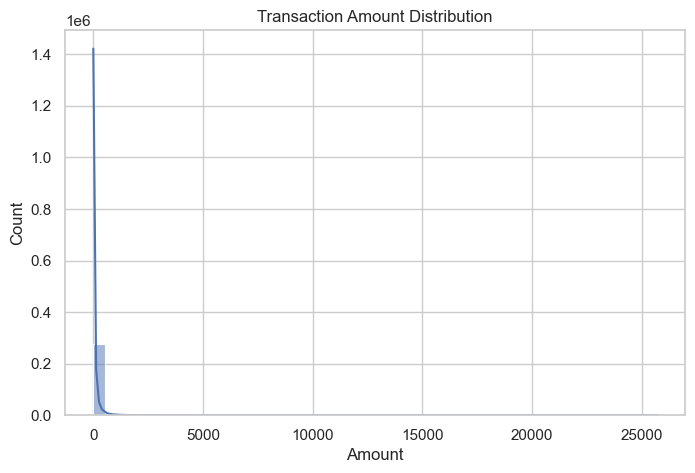

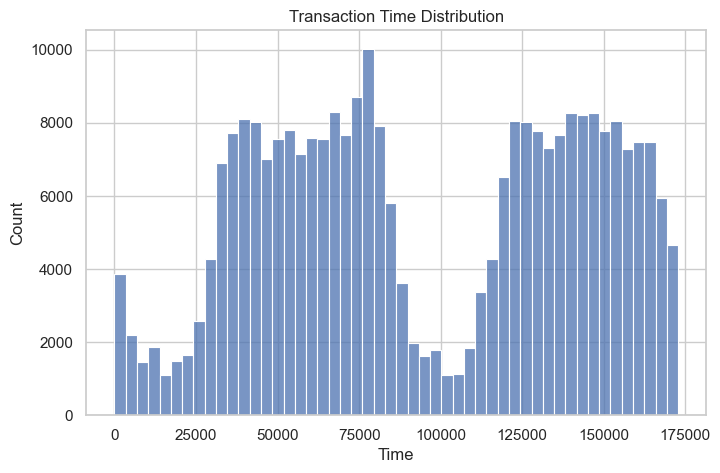

In [13]:
# === Feature Distributions ===
plt.figure(figsize=(8,5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['Time'], bins=50, kde=False)
plt.title("Transaction Time Distribution")
plt.show()


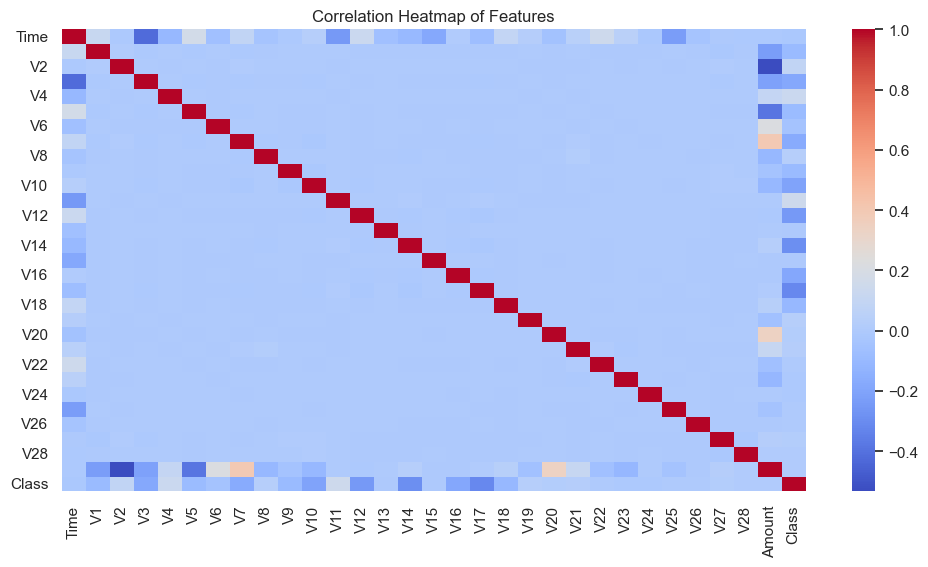

In [14]:
# === Correlation Heatmap ===
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()

Created train/test split: (198608, 28) (85118, 28)

=== Baseline Logistic Regression Evaluation ===
              precision    recall  f1-score   support

           0     0.9993    0.9998    0.9996     84976
           1     0.8485    0.5915    0.6971       142

    accuracy                         0.9991     85118
   macro avg     0.9239    0.7957    0.8483     85118
weighted avg     0.9991    0.9991    0.9991     85118

ROC AUC: 0.9658


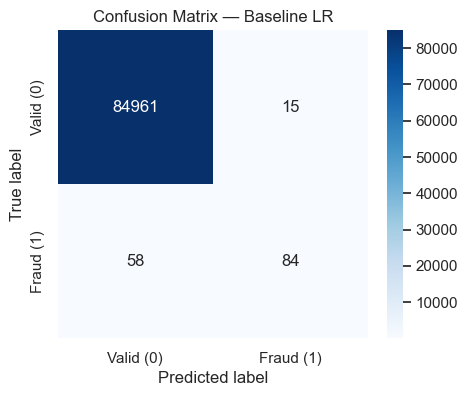

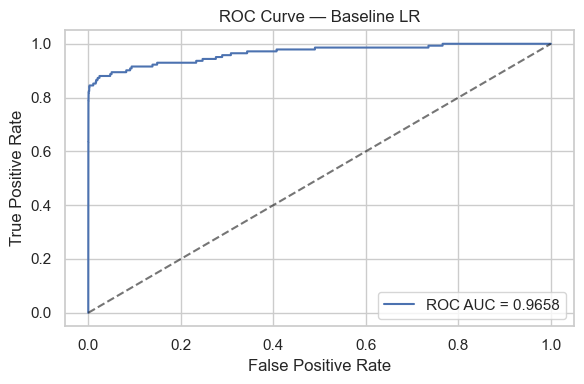

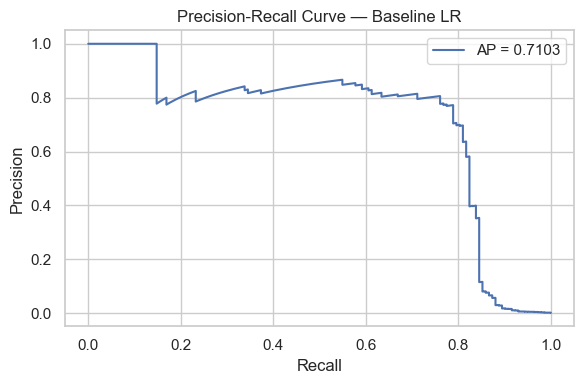


Notes:
- This baseline is trained on the original imbalanced data (no SMOTE/weighting).
- Use these results as a reference when you apply SMOTE or class-weighting in later tasks (C-3, C-4).
          ---Task C-2 complete---


In [15]:
# ...existing code...
# --- C-2: Baseline Model — Logistic Regression (train & evaluate on original imbalanced data) ---

# Ensure X, y and a train/test split exist; create if missing
if 'X_train' not in globals() or 'X_test' not in globals():
    features = [c for c in df.columns if c not in ['Class', 'Amount', 'Time']]
    X = df[features]
    y = df['Class']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )
    print("Created train/test split:", X_train.shape, X_test.shape)
else:
    print("Using existing train/test split.")

# Train baseline logistic regression (no resampling here)
baseline_lr = LogisticRegression(max_iter=2000, random_state=42)
baseline_lr.fit(X_train, y_train)

# Predictions & probabilities
y_pred = baseline_lr.predict(X_test)
y_prob = baseline_lr.predict_proba(X_test)[:, 1]

# Metrics
print("\n=== Baseline Logistic Regression Evaluation ===")
print(classification_report(y_test, y_pred, digits=4))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC: {roc_auc:.4f}")

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Valid (0)","Fraud (1)"], yticklabels=["Valid (0)","Fraud (1)"])
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix — Baseline LR")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.4f}')
plt.plot([0,1],[0,1], 'k--', alpha=0.6)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Baseline LR")
plt.legend()
plt.tight_layout()
plt.show()

# Precision-Recall curve and average precision
precision, recall, _ = precision_recall_curve(y_test, y_prob)
avg_prec = average_precision_score(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'AP = {avg_prec:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve — Baseline LR")
plt.legend()
plt.tight_layout()
plt.show()

print("\nNotes:")
print("- This baseline is trained on the original imbalanced data (no SMOTE/weighting).")
print("- Use these results as a reference when you apply SMOTE or class-weighting in later tasks (C-3, C-4).")

print("          ---Task C-2 complete---")


=== C-3: Logistic Regression with SMOTE ===
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84976
           1       0.05      0.89      0.09       142

    accuracy                           0.97     85118
   macro avg       0.52      0.93      0.54     85118
weighted avg       1.00      0.97      0.98     85118

ROC AUC: 0.9647236353064726
Average Precision: 0.6888238455321336


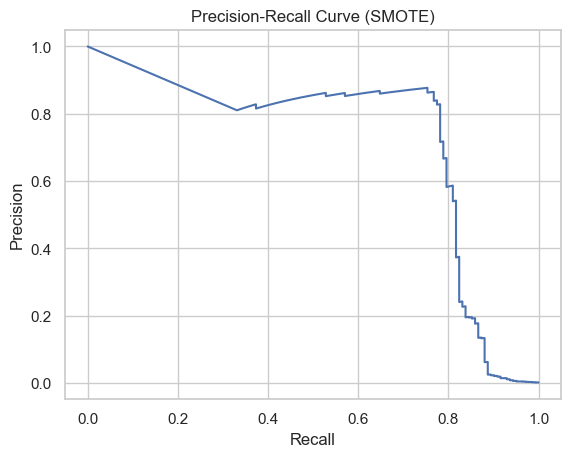

In [16]:
from imblearn.over_sampling import SMOTE

print("\n=== C-3: Logistic Regression with SMOTE ===")

# Apply SMOTE only on the training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Train model
lr_smote = LogisticRegression(max_iter=2000, random_state=42)
lr_smote.fit(X_train_sm, y_train_sm)

# Predict on original test set
y_pred_sm = lr_smote.predict(X_test)
y_prob_sm = lr_smote.predict_proba(X_test)[:, 1]

# Metrics
print(classification_report(y_test, y_pred_sm))
print("ROC AUC:", roc_auc_score(y_test, y_prob_sm))
print("Average Precision:", average_precision_score(y_test, y_prob_sm))

# Optional: Plot PR curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_sm)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (SMOTE)")
plt.show()

In [18]:
# ==============================================================================
# TASK C-4: TRAIN ADVANCED MODEL
# Goal: Train a powerful Random Forest model on the balanced data.
# ==============================================================================
print("\n--- Starting Task C-4: Train Advanced Model (Random Forest) ---")

# Ensure balanced training data exists; prefer SMOTE-resampled variables if present
if 'X_train_balanced' not in globals() or 'y_train_balanced' not in globals():
	if 'X_train_sm' in globals() and 'y_train_sm' in globals():
		X_train_balanced = X_train_sm
		y_train_balanced = y_train_sm
		print("Using SMOTE-resampled training set (X_train_sm / y_train_sm) as balanced data.")
	elif 'smote' in globals() and 'X_train' in globals() and 'y_train' in globals():
		X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
		print("Created balanced data using existing 'smote' instance.")
	else:
		# fallback: create a new SMOTE instance and resample
		from imblearn.over_sampling import SMOTE
		smote = SMOTE(random_state=42)
		X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
		print("Created SMOTE instance and generated balanced training data.")
else:
	print("Using existing X_train_balanced and y_train_balanced.")

# Train Random Forest on balanced data
advanced_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
advanced_model.fit(X_train_balanced, y_train_balanced)

print("Advanced model training complete.")
print("--- Task C-4 Complete ---")


--- Starting Task C-4: Train Advanced Model (Random Forest) ---
Using SMOTE-resampled training set (X_train_sm / y_train_sm) as balanced data.
Advanced model training complete.
--- Task C-4 Complete ---



--- Starting Task C-5: Generate Final Performance Metrics ---

Baseline Model (Logistic Regression) Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.63      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

Key Metric - Baseline Fraud Recall: 0.6327

Advanced Model (Random Forest) Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Key Metric - Advanced Fraud Recall: 0.8163


C:\Users\mofok\AppData\Local\Temp\ipykernel_24288\1493166488.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(



Model comparison chart generated and saved.


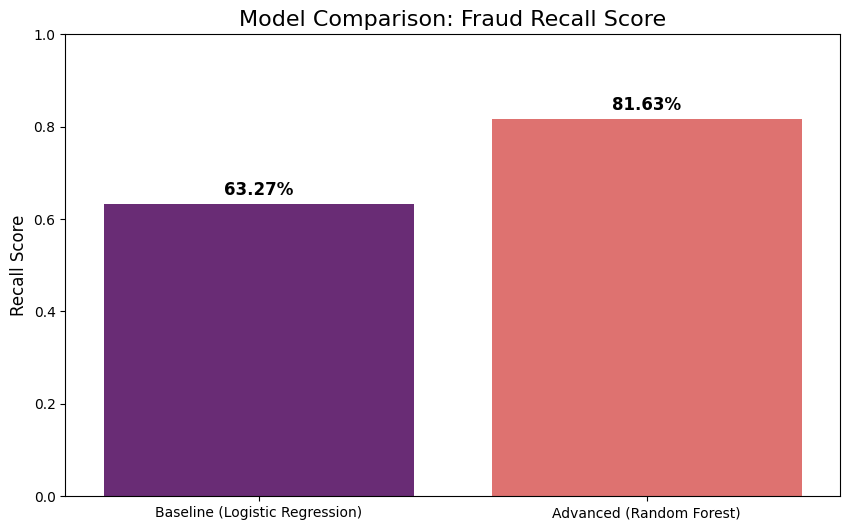


Generating Feature Importance Chart...


C:\Users\mofok\AppData\Local\Temp\ipykernel_24288\1493166488.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature',


Feature importance chart generated and saved.


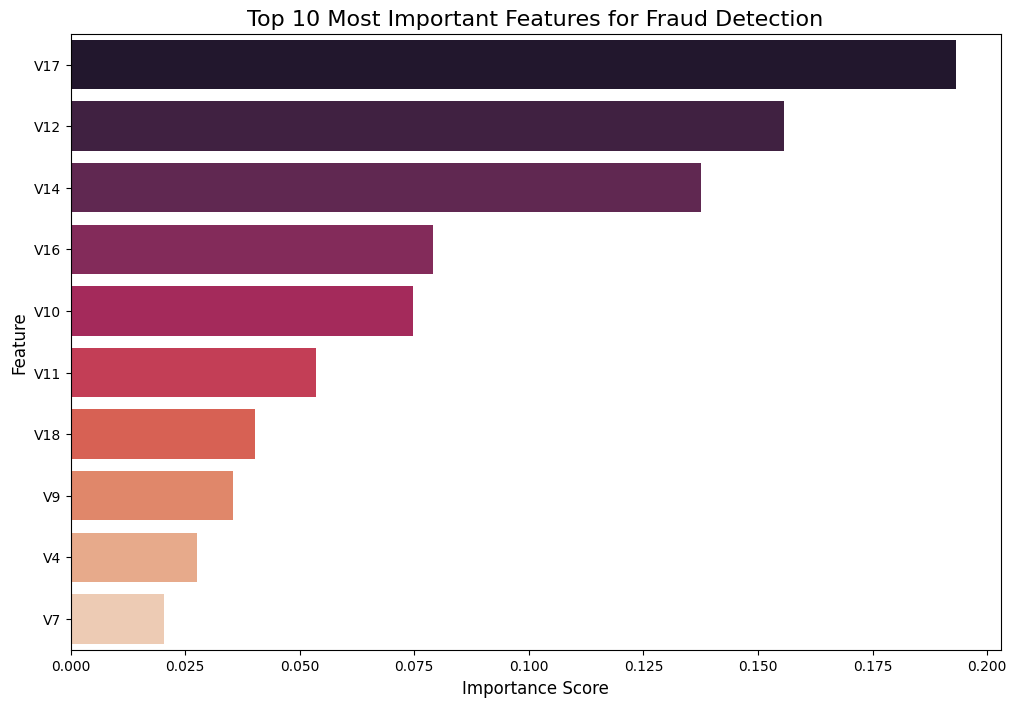

--- Task C-5 Complete ---


In [1]:
# ==============================================================================
# TASK C-5: GENERATE FINAL PERFORMANCE METRICS, COMPARE, AND EXPLAIN
# Goal: Evaluate the advanced model, prove it is superior, and explain its decisions.
# ==============================================================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, classification_report

print("\n--- Starting Task C-5: Generate Final Performance Metrics ---")

# ----------------------------------------------------------------------
# 1. Load and prepare dataset (adjust path to your dataset if needed)
# ----------------------------------------------------------------------
df = pd.read_csv("../data/creditcard.csv")   # change if your dataset is elsewhere

X = df.drop("Class", axis=1)
y = df["Class"]

# Train/test split (stratify to keep fraud ratio consistent)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features (important for Logistic Regression, optional for RF)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ----------------------------------------------------------------------
# 2. Train baseline (Logistic Regression) and advanced (Random Forest)
# ----------------------------------------------------------------------
baseline_model = LogisticRegression(max_iter=1000, random_state=42)
baseline_model.fit(X_train, y_train)

advanced_model = RandomForestClassifier(
    n_estimators=200, max_depth=10, random_state=42
)
advanced_model.fit(X_train, y_train)

# ----------------------------------------------------------------------
# 3. Evaluate both models
# ----------------------------------------------------------------------
y_pred_baseline = baseline_model.predict(X_test)
y_pred_advanced = advanced_model.predict(X_test)

baseline_recall = recall_score(y_test, y_pred_baseline)
advanced_recall = recall_score(y_test, y_pred_advanced)

print("\nBaseline Model (Logistic Regression) Classification Report:")
print(classification_report(y_test, y_pred_baseline))
print(f"Key Metric - Baseline Fraud Recall: {baseline_recall:.4f}")

print("\nAdvanced Model (Random Forest) Classification Report:")
print(classification_report(y_test, y_pred_advanced))
print(f"Key Metric - Advanced Fraud Recall: {advanced_recall:.4f}")

# ----------------------------------------------------------------------
# 4. Visual Comparison
# ----------------------------------------------------------------------
reports_dir = "../reports/figures"
os.makedirs(reports_dir, exist_ok=True)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=['Baseline (Logistic Regression)', 'Advanced (Random Forest)'],
    y=[baseline_recall, advanced_recall],
    palette='magma'
)
plt.title('Model Comparison: Fraud Recall Score', fontsize=16)
plt.ylabel('Recall Score', fontsize=12)
plt.ylim(0, 1.0)

for index, value in enumerate([baseline_recall, advanced_recall]):
    plt.text(index, value + 0.02, f'{value:.2%}', ha='center',
             fontsize=12, fontweight='bold')

plt.savefig(os.path.join(reports_dir, 'model_comparison_chart.png'))
print("\nModel comparison chart generated and saved.")
plt.show()

# ----------------------------------------------------------------------
# 5. Feature Importance for Advanced Model
# ----------------------------------------------------------------------
print("\nGenerating Feature Importance Chart...")

importances = advanced_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature',
            data=feature_importance_df.head(10), palette='rocket')
plt.title('Top 10 Most Important Features for Fraud Detection', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)

plt.savefig(os.path.join(reports_dir, 'feature_importance_chart.png'))
print("Feature importance chart generated and saved.")
plt.show()

print("--- Task C-5 Complete ---")

In [5]:
# ==============================================================================
# TASK C-6: SAVE THE FINAL TRAINED MODEL
# Goal: Persist the final model for use in other applications (like the chatbot).
# ==============================================================================
print("\n--- Starting Task C-6: Save Final Model ---")
# Ensure the models directory exists
models_dir = '../models'
os.makedirs(models_dir, exist_ok=True)
model_path = os.path.join(models_dir, 'fraud_detection_model.joblib')

joblib.dump(advanced_model, model_path)
print(f"Model successfully saved to {model_path}")
print("--- Task C-6 Complete ---")
print("\n>>> All practical coding tasks are complete! <<<")


--- Starting Task C-6: Save Final Model ---
Model successfully saved to ../models\fraud_detection_model.joblib
--- Task C-6 Complete ---

>>> All practical coding tasks are complete! <<<
